In [1]:
!pip install gspread oauth2client pandas


   ---------------------------------------- 0.0/57.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/57.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/57.3 kB ? eta -:--:--
   ------- -------------------------------- 10.2/57.3 kB ? eta -:--:--
   ------- -------------------------------- 10.2/57.3 kB ? eta -:--:--
   ------- -------------------------------- 10.2/57.3 kB ? eta -:--:--
   ------- -------------------------------- 10.2/57.3 kB ? eta -:--:--
   ------- -------------------------------- 10.2/57.3 kB ? eta -:--:--
   ------- -------------------------------- 10.2/57.3 kB ? eta -:--:--
   --------------------- ------------------ 30.7/57.3 kB 87.5 kB/s eta 0:00:01
   --------------------- ------------------ 30.7/57.3 kB 87.5 kB/s eta 0:00:01
   --------------------- ------------------ 30.7/57.3 kB 87.5 kB/s eta 0:00:01
   --------------------- ------------------ 30.7/57.3 kB 87.5 kB/s eta 0:00:01
   --------------------- ------------------ 30.7


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd

csv_file_path = 'Mydata.csv'

df = pd.read_csv(csv_file_path)

df.head()


,Call_Id,Lead_Id,Campaign_ID,Advertiser_Id,Hid,Call_Status,Lead_Status,Agent_Duration(seconds),Customer_Duration(seconds),From_Calling_Number,To_Calling_Number,Attempt_No,Created_At,Updated_At,Agent_Id,Agent_Name
0,26807,410987,930228,1883,40831aceu6850re1ece43deeqf20a6o,no-answer,Not Interested,8,0,9.186570e+11,+919552777764,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,Mansi Jaiswal
1,26808,410986,930228,1883,3dc489fbg6850pe1ece43deewf20a6v,completed,Not Interested,51,34,9.186570e+11,+917275507242,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,Mansi Jaiswal
2,26809,410985,930228,1883,92d7bfbag6850se1ece43deevf20a6y,no-answer,Invalid Number,9,0,9.186570e+11,+919430734094,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,Mansi Jaiswal
3,26810,410984,930228,1883,3a9872eem6850oe1ece43deetf20a6m,completed,Not Interested,45,25,9.186570e+11,+918349289209,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,Mansi Jaiswal
4,26811,410981,930228,1883,3dde873bx6850je1ece43deehf20a6u,no-answer,Busy,45,0,9.186570e+11,+917054670061,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,Mansi Jaiswal


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24623 entries, 0 to 24622
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call_Id                     24623 non-null  int64  
 1   Lead_Id                     24623 non-null  int64  
 2   Campaign_ID                 24623 non-null  int64  
 3   Advertiser_Id               24623 non-null  int64  
 4   Hid                         24623 non-null  object 
 5   Call_Status                 24623 non-null  object 
 6   Lead_Status                 24623 non-null  object 
 7   Agent_Duration(seconds)     24623 non-null  int64  
 8   Customer_Duration(seconds)  24623 non-null  int64  
 9   From_Calling_Number         24500 non-null  float64
 10  To_Calling_Number           24623 non-null  object 
 11  Attempt_No                  24623 non-null  int64  
 12  Created_At                  24623 non-null  object 
 13  Updated_At                  246

In [13]:

total_calls = df['Call_Id'].nunique()

unique_leads = df['Lead_Id'].nunique()

calls_connected = df[df['Call_Status'] == 'Answered']['Call_Id'].nunique()

unique_calls_connected = df[df['Call_Status'] == 'Answered']['Lead_Id'].nunique()

leads_converted = df[df['Lead_Status'] == 'Interested']['Call_Id'].nunique()

leads_lost = df[df['Lead_Status'] == 'Not Interested']['Call_Id'].nunique()

avg_agent_call_duration = df['Agent_Duration(seconds)'].mean()

avg_customer_call_duration = df['Customer_Duration(seconds)'].mean()

campaign_performance = {
    'Total Calls': total_calls,
    'Unique Leads': unique_leads,
    'Calls Connected': calls_connected,
    'Unique Calls Connected': unique_calls_connected,
    'Leads Converted': leads_converted,
    'Leads Lost': leads_lost,
    'Average Agent Call Duration': avg_agent_call_duration,
    'Average Customer Call Duration': avg_customer_call_duration
}

campaign_performance_df = pd.DataFrame([campaign_performance])
print(campaign_performance_df)


   Total Calls  Unique Leads  Calls Connected  Unique Calls Connected  \
0        24623          8278                0                       0   

   Leads Converted  Leads Lost  Average Agent Call Duration  \
0             3451        4916                    35.938432   

   Average Customer Call Duration  
0                       12.986679  


In [15]:
lead_disposition = df['Lead_Status'].value_counts().reset_index()
lead_disposition.columns = ['Lead_Status', 'Count']

print(lead_disposition)


               Lead_Status  Count
0                No Answer   6478
1           Not Interested   4916
2                     Busy   3743
3               Interested   3451
4            Not Reachable   1443
5              Voice Issue   1208
6           Invalid Number    785
7         Language Barrier    657
8   Bought Another Product    479
9                Call Back    452
10          Already Bought    340
11        Already Verified    240
12                 Opt Out    107
13     Already Buy/ Bought     87
14                  Failed     81
15     Out of Geo Location     58
16   Not Eligible - Income     53
17      Not Eligible - Age     16
18                 Hung-up     10
19               Duplicate      9
20                Status26      9
21                 Ringing      1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24623 entries, 0 to 24622
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Call_Id                     24623 non-null  int64  
 1   Lead_Id                     24623 non-null  int64  
 2   Campaign_ID                 24623 non-null  int64  
 3   Advertiser_Id               24623 non-null  int64  
 4   Hid                         24623 non-null  object 
 5   Call_Status                 24623 non-null  object 
 6   Lead_Status                 24623 non-null  object 
 7   Agent_Duration(seconds)     24623 non-null  int64  
 8   Customer_Duration(seconds)  24623 non-null  int64  
 9   From_Calling_Number         24500 non-null  float64
 10  To_Calling_Number           24623 non-null  object 
 11  Attempt_No                  24623 non-null  int64  
 12  Created_At                  24623 non-null  object 
 13  Updated_At                  246

In [22]:
agent_performance = df.groupby('Agent_Name').agg({
    'Call_Id': 'nunique',
    'Call_Status': lambda x: (x == 'Answered').sum(),
    'Lead_Status': lambda x: (x == 'Interested').sum(),
    'Agent_Duration(seconds)': 'mean',
    'Customer_Duration(seconds)': 'mean'
}).rename(columns={
    'Call_Id': 'Number of Calls Made',
    'Call_Status': 'Calls Connected',
    'Lead_Status': 'Leads Converted',
    'Agent_Duration(seconds)': 'Average Agent Call Duration',
    'Customer_Duration(seconds)': 'Average Customer Call Duration'
}).reset_index()

print(agent_performance)


              Agent_Name  Number of Calls Made  Calls Connected  \
0          ATHARV GAWADE                   386                0   
1          Abhijit Bhatt                  1147                0   
2       Amitabh Bachchan                   999                0   
3           Gaurav Rawat                    44                0   
4      Geetanjali Dhiman                   533                0   
5          Manjeet Rawat                   668                0   
6       Manneajeet Singh                    27                0   
7          Mansi Jaiswal                  4134                0   
8                 Mayank                    57                0   
9   Mohammad Husain Raza                   750                0   
10                Mumtaz                  2453                0   
11       Nainsee Jaiswal                  4372                0   
12        Niharika Bhatt                   582                0   
13                 Rahul                  1304                

Visualize Lead Disposition

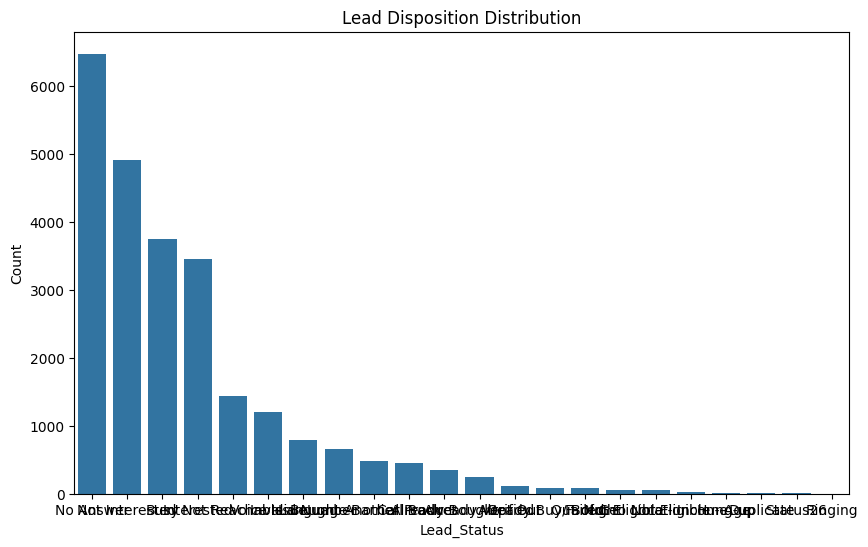

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Lead Disposition
plt.figure(figsize=(10, 6))
sns.barplot(x='Lead_Status', y='Count', data=lead_disposition)
plt.title('Lead Disposition Distribution')
plt.show()


Call Status Distribution by Campaign

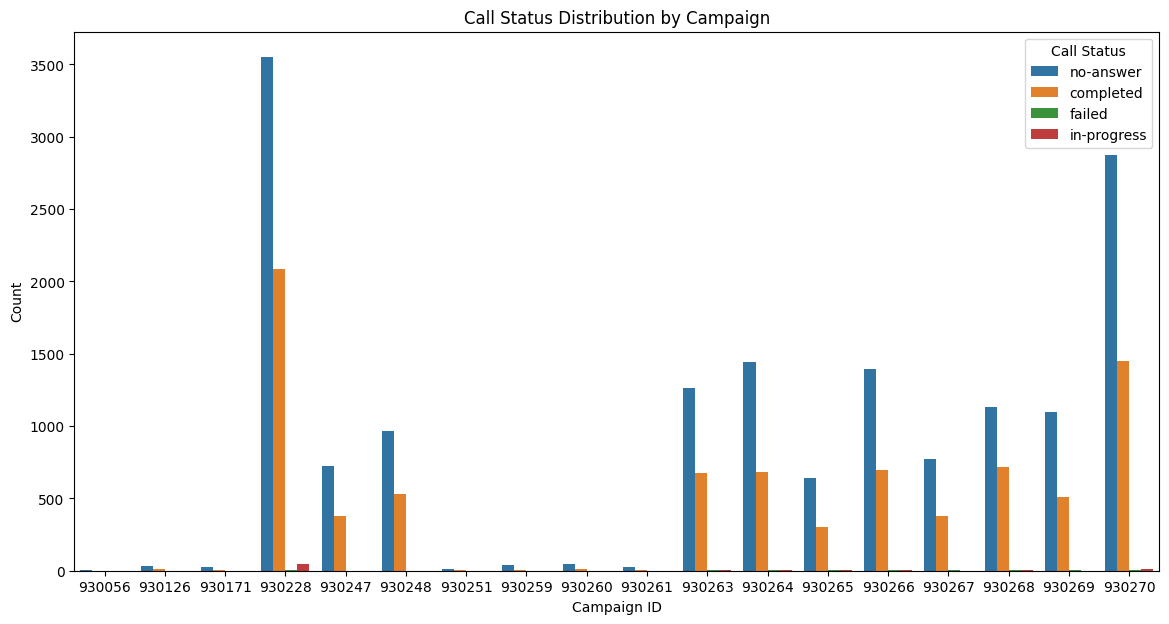

In [25]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Campaign_ID', hue='Call_Status')
plt.title('Call Status Distribution by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Count')
plt.legend(title='Call Status')
plt.show()


Lead Status Distribution by Campaign

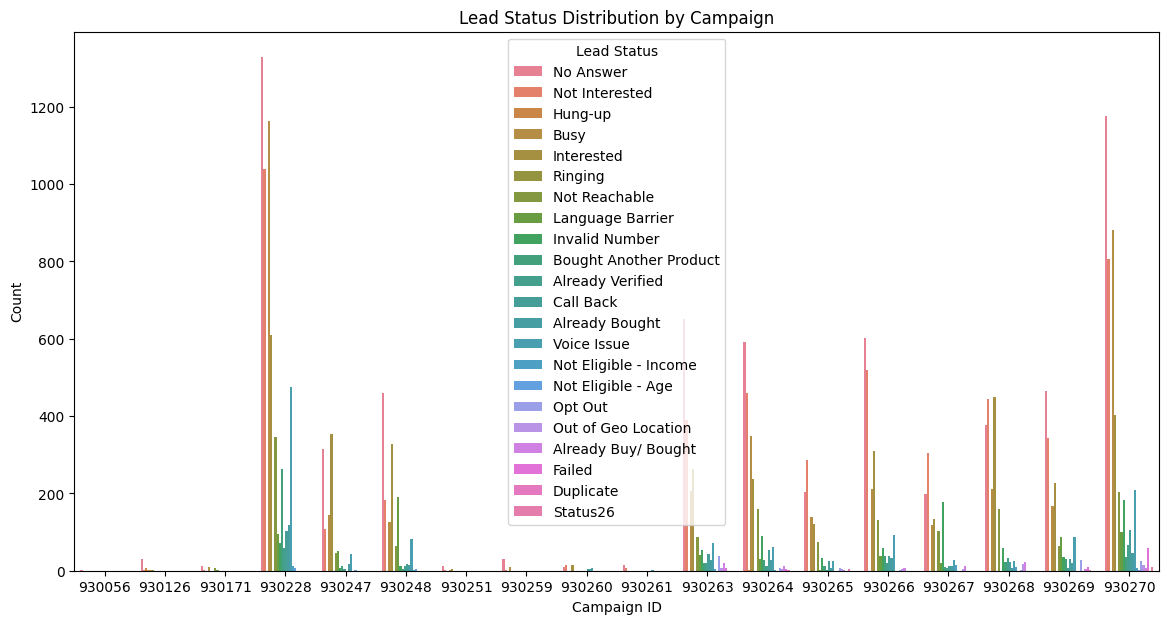

In [26]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Campaign_ID', hue='Lead_Status')
plt.title('Lead Status Distribution by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Count')
plt.legend(title='Lead Status')
plt.show()


Agent Performance Heatmap

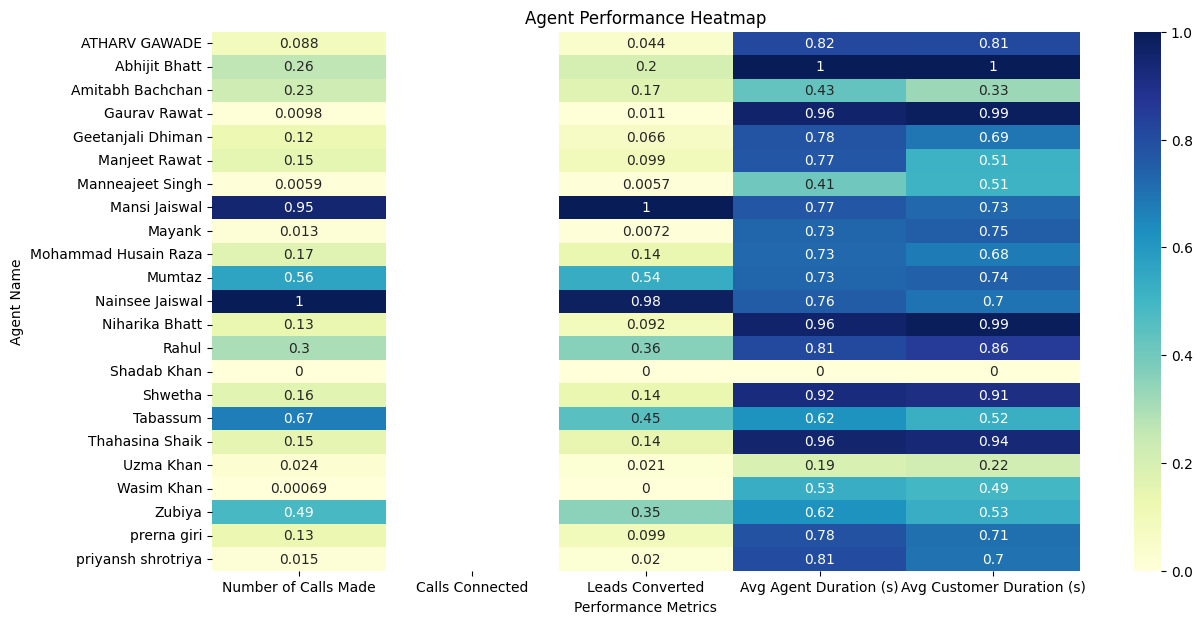

In [29]:
agent_performance = df.groupby('Agent_Name').agg({
    'Call_Id': 'nunique',
    'Call_Status': lambda x: (x == 'Answered').sum(),
    'Lead_Status': lambda x: (x == 'Interested').sum(),
    'Agent_Duration(seconds)': 'mean',
    'Customer_Duration(seconds)': 'mean'
}).rename(columns={
    'Call_Id': 'Number of Calls Made',
    'Call_Status': 'Calls Connected',
    'Lead_Status': 'Leads Converted',
    'Agent_Duration(seconds)': 'Avg Agent Duration (s)',
    'Customer_Duration(seconds)': 'Avg Customer Duration (s)'
}).reset_index()

agent_performance_normalized = agent_performance.set_index('Agent_Name').apply(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.figure(figsize=(14, 7))
sns.heatmap(agent_performance_normalized, annot=True, cmap='YlGnBu')
plt.title('Agent Performance Heatmap')
plt.xlabel('Performance Metrics')
plt.ylabel('Agent Name')
plt.show()


Call Attempts Distribution


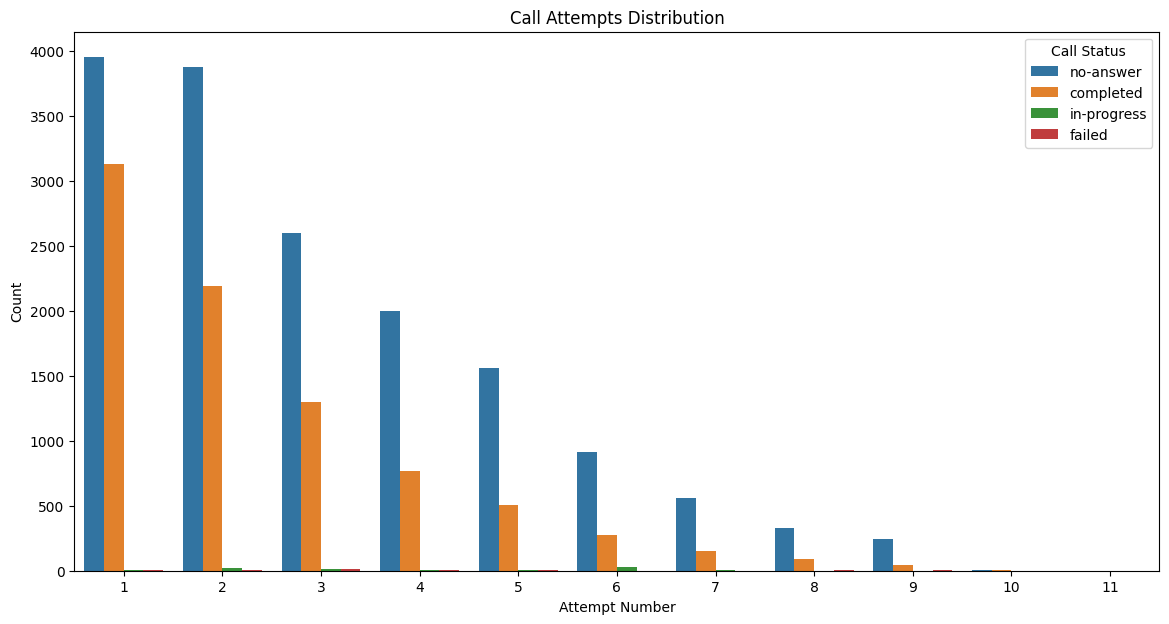

In [30]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Attempt_No', hue='Call_Status')
plt.title('Call Attempts Distribution')
plt.xlabel('Attempt Number')
plt.ylabel('Count')
plt.legend(title='Call Status')
plt.show()


Call Duration Distribution

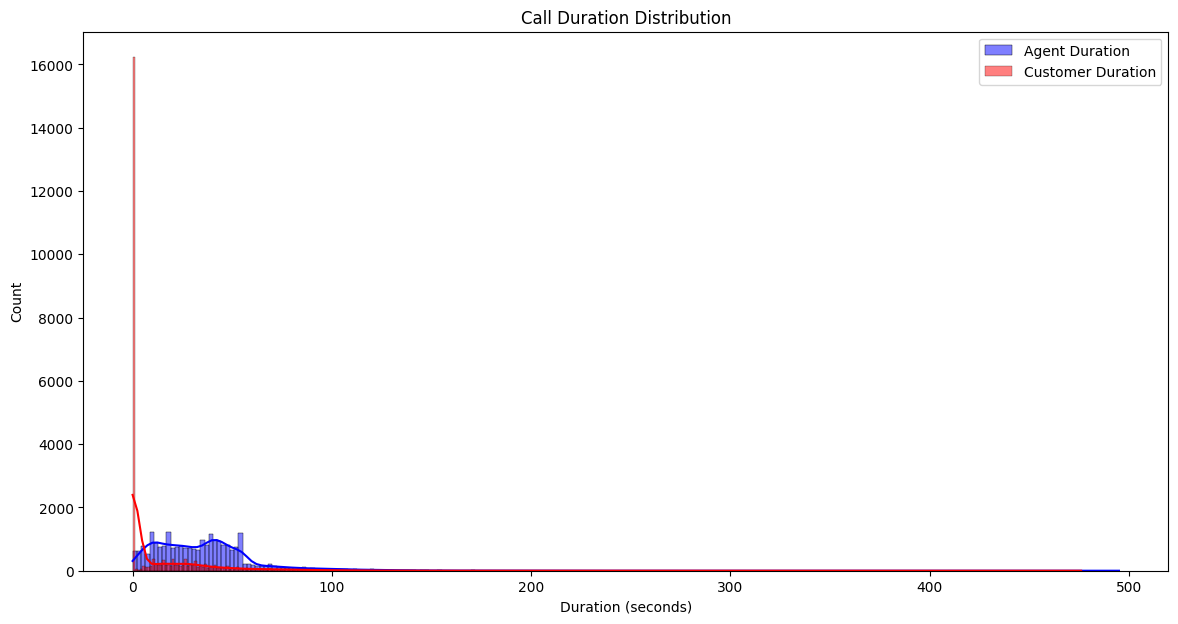

In [31]:
plt.figure(figsize=(14, 7))
sns.histplot(df['Agent_Duration(seconds)'], kde=True, color='b', label='Agent Duration')
sns.histplot(df['Customer_Duration(seconds)'], kde=True, color='r', label='Customer Duration')
plt.title('Call Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.legend()
plt.show()


Time Series Analysis of Calls

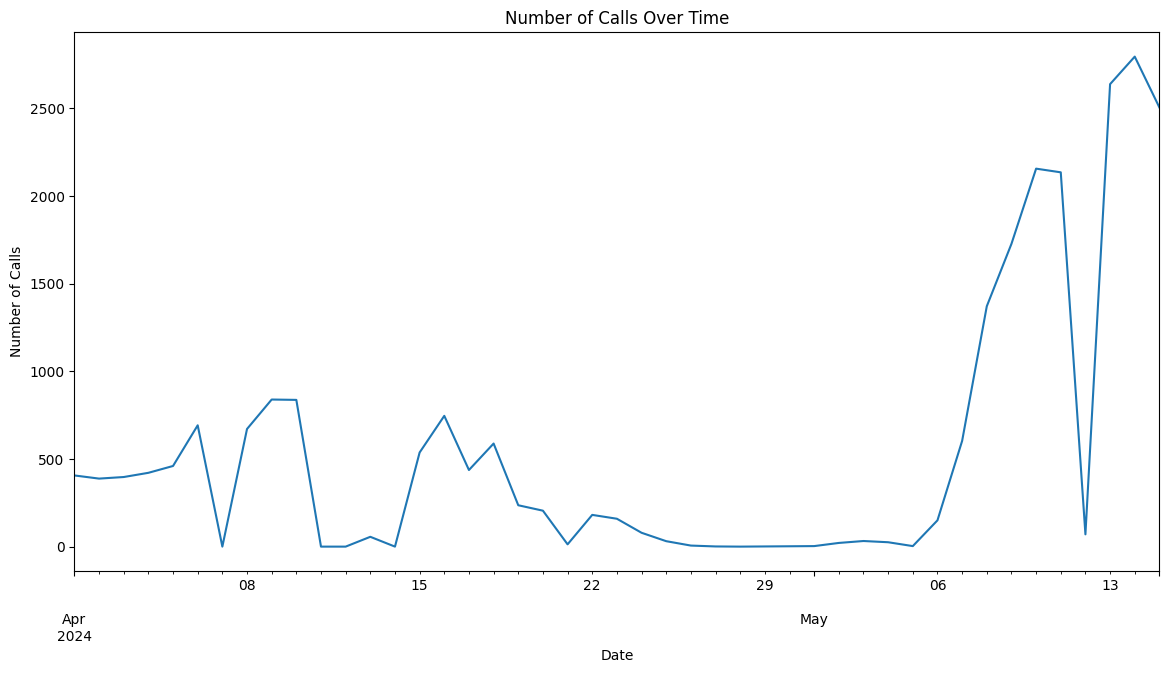

In [32]:
df['Created_At'] = pd.to_datetime(df['Created_At'])
df['Updated_At'] = pd.to_datetime(df['Updated_At'])

df.set_index('Created_At', inplace=True)
calls_over_time = df.resample('D').size()

plt.figure(figsize=(14, 7))
calls_over_time.plot()
plt.title('Number of Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()
